In [15]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

In [16]:
# 创建图像尺寸
width = 256
height = 256

# 生成坐标网格
x = np.arange(width) - (width-1)/2.0
y = (height-1)/2.0 - np.arange(height)
x, y = np.meshgrid(x, y)

In [17]:
# 计算极角（角度制）
theta = np.degrees(np.arctan2(y, x))
theta = np.mod(theta + 360, 360)  # 转换为0-360度

# 计算扇形区域（48个辐条）
num_spokes = 48
sector_size = 360 / num_spokes
sectors = np.floor(theta / sector_size)

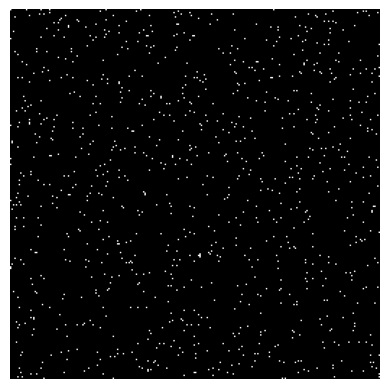

In [18]:
# 生成256x256的随机散斑图片
# speckle_image = np.zeros((height, width), dtype=np.uint32)
speckle_image = np.zeros((height, width))
num_speckles = 1000
indices = np.random.choice(height * width, num_speckles, replace=False)
speckle_image[np.unravel_index(indices, (height, width))] = 1

plt.imshow(speckle_image, cmap='gray')
plt.axis('off')  # 不显示坐标轴
plt.show()

In [ ]:
# 加载 PSF 图像
psf_image = Image.open('PSF256_405nm.tif')
psf_array = np.array(psf_image)

# 对散斑图片进行卷积
# 对散斑图片进行卷积，使用模式'constant'并设置cval=0.0以减少内存使用
convolved_image = convolve(speckle_image, psf_array, mode='constant', cval=0.0)

# 显示卷积后的图像
plt.imshow(psf_array, cmap='gray')
plt.axis('off')  # 不显示坐标轴
plt.show()

MemoryError: 